<a href="https://colab.research.google.com/github/mariaeduardacarpejani/mariaeduardacarpejani/blob/main/Tcc_AnginaAlert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Integrantes:
Guilherme Augusto Pereira Dias
Maria Edurda de Oliveira Carpejani
```










# **Bibliotecas**

In [3]:
!pip install tensorflow
!pip install scikit-learn
!pip install imbalanced-learn
!pip install xgboost

In [4]:
# Bibliotecas para importar e manipular o dataset
import pandas as pd

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para a Rede Neural Convolutiva (CNN)
import numpy as np
from tensorflow.keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Bibliotecas para Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Bibliotecas para Rede Neural
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Bibliotecas para Rede Neural com Cross-Validation
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Bibliotecas para XGBoost
import xgboost as xgb
from sklearn.metrics import log_loss, accuracy_score

# Bibliotecas para outro teste com XGBoost
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Bibliotecas para teste de precisão do XGBoost
from sklearn.metrics import precision_score

# Bibliotecas para RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas para cross-validation entre XGBoost e Rede Neural
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, accuracy_score
import xgboost as xgb
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


# **Dataset - Angina**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset_angina/heart.csv')
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0




```
Age = Idade do Paciente

Sex = Sex  
1 = masculino
0 = feminino

Cp = chest pain type
0 = Tipica angina
1 = Atipica angina
2 = Não tem angina
3 = Assintomatica

Trestbps = Pressão Arterial

Chol = Colesterol - mg/dl

Fbs = Açucar no sangue em jejum > 120 mg/dl
1 = true
0 = false

Restecg = Resultados eletrocardiográficos pacientes em repouso
0 = Normal
1 = Anormalidade > 0.05
2 = Alteração - hipertrofia ventricular esquerda

Thalach = Frequência cardíaca alterada

Exang = Angina induzida por exercício
1 =  Sim
0 = Não

Oldpeak = ST depession induced causada por exercicio de repouso

Slope = Inclinação do segmento ST do exercício de pico
0 = ascendente
1 = plano
2 = descendente

thal
0 =  Normal
1 = defeitos fixos
2 = defeito reversível

target = diagnóstico de doença cardíaca
0 < 50% diameter narrowing
1 > 50% diameter narrowing




```



# **Gráficos**

---------------
Homens: 207
Mulheres: 96
Diferença entre Homens e Mulheres: 111


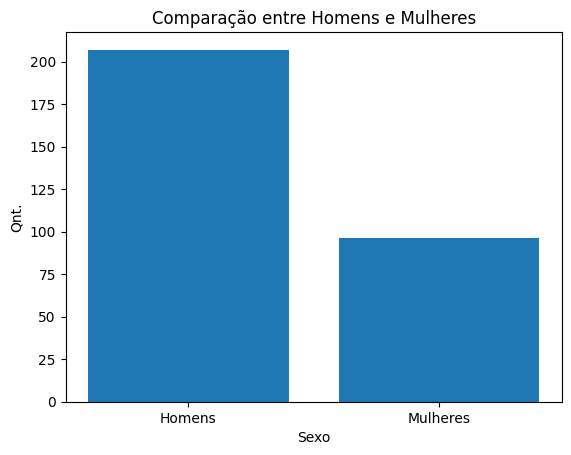

In [7]:
#Comparação entre Homens e Mulheres
num_m = (df['sex'] == 1).sum()
num_f = (df['sex'] == 0).sum()

plt.bar(['Homens', 'Mulheres'], [num_m, num_f])
plt.title('Comparação entre Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Qnt.')
print('---' * 5)
print(f'Homens: {num_m}')
print(f'Mulheres: {num_f}')
print(f'Diferença entre Homens e Mulheres: {num_m - num_f}')

---------------
Típica Angina: 143
Atípica Angina: 50
Não tem Angina: 87
Assintomática: 23


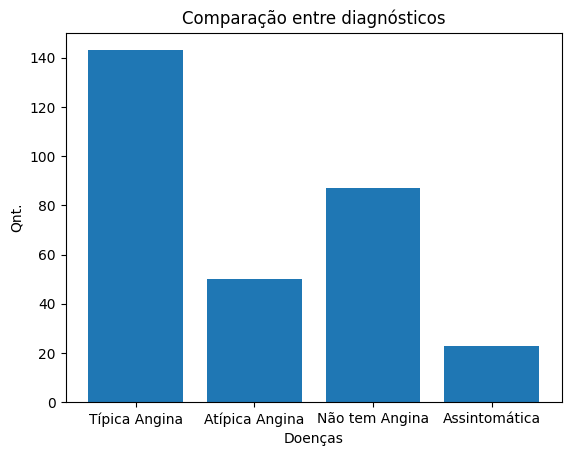

In [8]:
#Comparação entre diagnósticos
num_ta = (df['chest_pain_type'] == 0).sum()
num_aa = (df['chest_pain_type'] == 1).sum()
num_na = (df['chest_pain_type'] == 2).sum()
num_as = (df['chest_pain_type'] == 3).sum()

plt.bar(['Típica Angina', 'Atípica Angina', 'Não tem Angina', 'Assintomática'], [num_ta, num_aa, num_na, num_as])
plt.title('Comparação entre diagnósticos')
plt.xlabel('Doenças')
plt.ylabel('Qnt.')
print('---' * 5)
print(f'Típica Angina: {num_ta}')
print(f'Atípica Angina: {num_aa}')
print(f'Não tem Angina: {num_na}')
print(f'Assintomática: {num_as}')

---------------
Verdadeiro: 258
Falso: 45


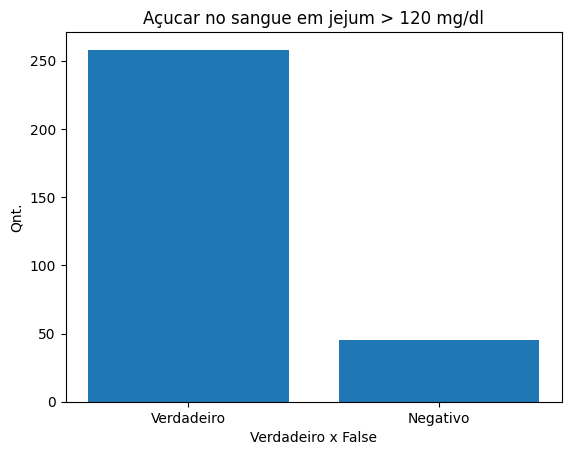

In [9]:
#Comparação entre Açucar no sangue em jejum > 120 mg/dl
num_true = (df['fasting_blood_sugar'] == 0).sum()
num_false = (df['fasting_blood_sugar'] == 1).sum()

plt.bar(['Verdadeiro', 'Negativo'], [num_true, num_false])
plt.title('Açucar no sangue em jejum > 120 mg/dl')
plt.xlabel('Verdadeiro x False')
plt.ylabel('Qnt.')
print('---' * 5)
print(f'Verdadeiro: {num_true}')
print(f'Falso: {num_false}')


---------------
Normal: 147
Anormalidade: 152
Alteração - hipertrofia ventricular esquerda: 4


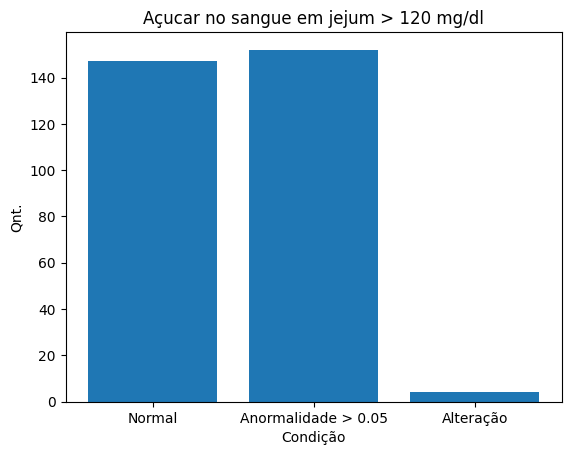

In [10]:
#Comparação entre Resultados eletrocardiográficos pacientes em repouso
num_norm = (df['restecg'] == 0).sum()
num_anorm = (df['restecg'] == 1).sum()
num_alt = (df['restecg'] == 2).sum()

plt.bar(['Normal', 'Anormalidade > 0.05', 'Alteração'], [num_norm, num_anorm, num_alt])
plt.title('Açucar no sangue em jejum > 120 mg/dl')
plt.xlabel('Condição')
plt.ylabel('Qnt.')
print('---' * 5)
print(f'Normal: {num_norm}')
print(f'Anormalidade: {num_anorm}')
print(f'Alteração - hipertrofia ventricular esquerda: {num_alt}')

---------------
Normal: 204
Anormalidade: 99


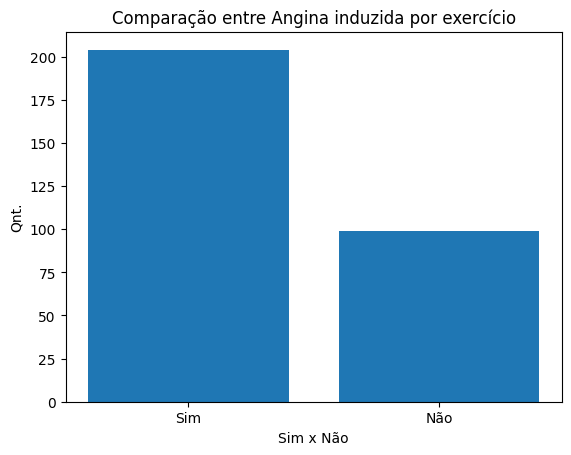

In [11]:
#Comparação entre Angina induzida por exercício
num_exangs = (df['exang'] == 0).sum()
num_exangn = (df['exang'] == 1).sum()

plt.bar(['Sim', 'Não'], [num_exangs, num_exangn])
plt.title('Comparação entre Angina induzida por exercício')
plt.xlabel('Sim x Não')
plt.ylabel('Qnt.')
print('---' * 5)
print(f'Normal: {num_exangs}')
print(f'Anormalidade: {num_exangn}')

---------------
Ascente: 21
Plano: 140
Descendente: 142


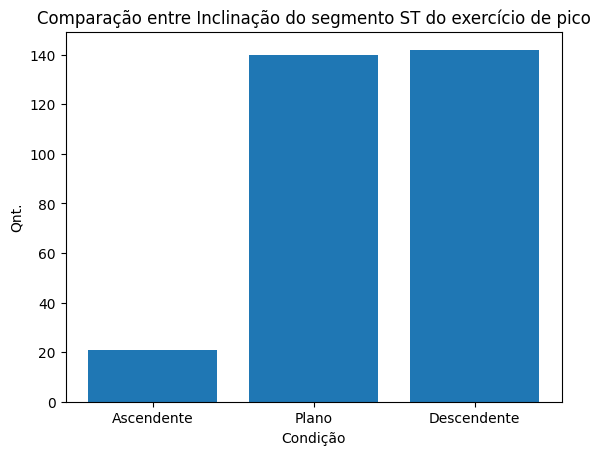

In [12]:
#Comparação entre Inclinação do segmento ST do exercício de pico
num_asc = (df['slope'] == 0).sum()
num_plano = (df['slope'] == 1).sum()
num_desc = (df['slope'] == 2).sum()

plt.bar(['Ascendente', 'Plano', 'Descendente'], [num_asc, num_plano, num_desc])
plt.title('Comparação entre Inclinação do segmento ST do exercício de pico')
plt.xlabel('Condição')
plt.ylabel('Qnt.')
print('---' * 5)
print(f'Ascente: {num_asc}')
print(f'Plano: {num_plano}')
print(f'Descendente: {num_desc}')

---------------
Ascente: 2
Plano: 18
Descendente: 166


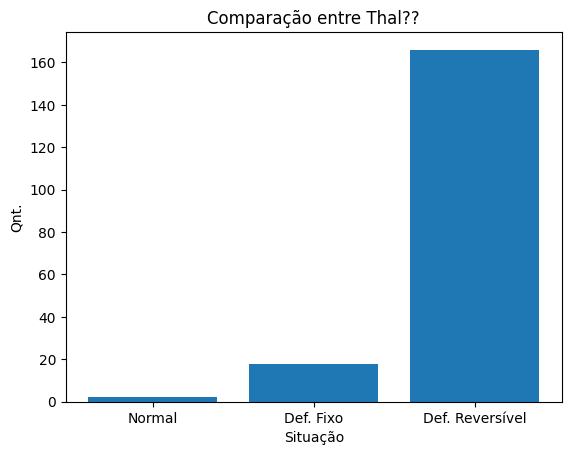

In [13]:
#Comparação entre Thal??
num_norm = (df['thal'] == 0).sum()
num_def_fix = (df['thal'] == 1).sum()
num_def_rever = (df['thal'] == 2).sum()

plt.bar(['Normal', 'Def. Fixo', 'Def. Reversível'], [num_norm, num_def_fix, num_def_rever])
plt.title('Comparação entre Thal??')
plt.xlabel('Situação')
plt.ylabel('Qnt.')
print('---' * 5)
print(f'Ascente: {num_norm}')
print(f'Plano: {num_def_fix}')
print(f'Descendente: {num_def_rever}')

**Distribuição - Histograma**

<Axes: >

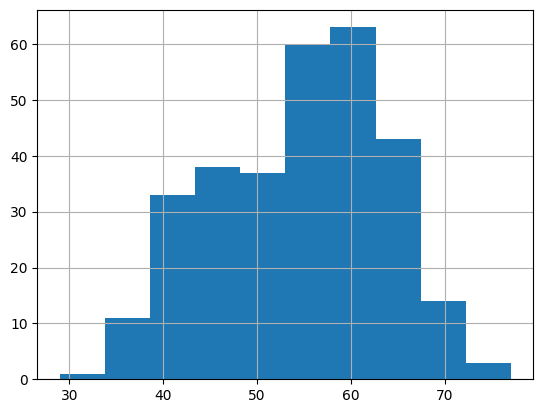

In [14]:
df['age'].hist()

<Axes: >

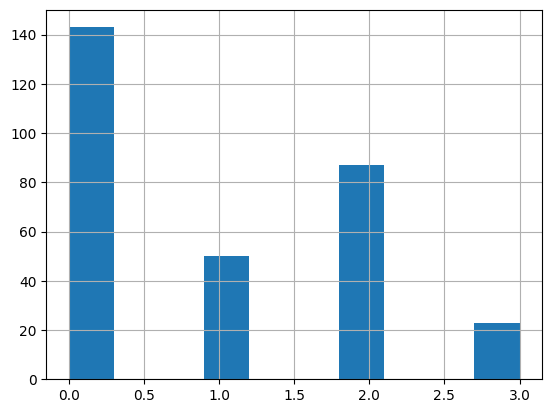

In [15]:
df['chest_pain_type'].hist()

<Axes: >

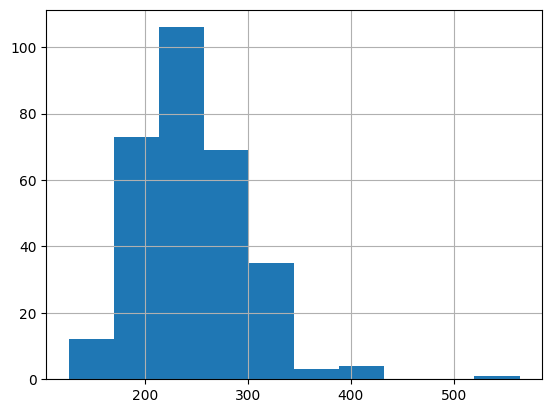

In [16]:
df['cholestoral'].hist()

<Axes: >

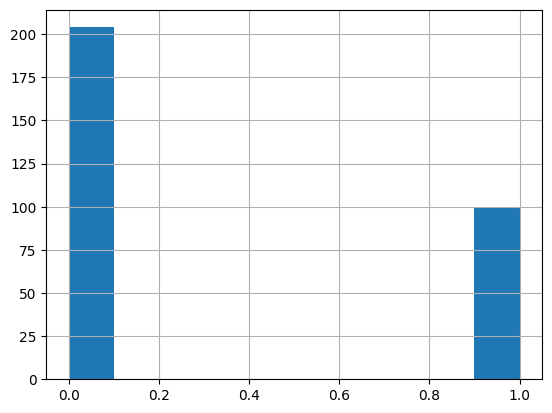

In [17]:
df['exang'].hist()

<Axes: >

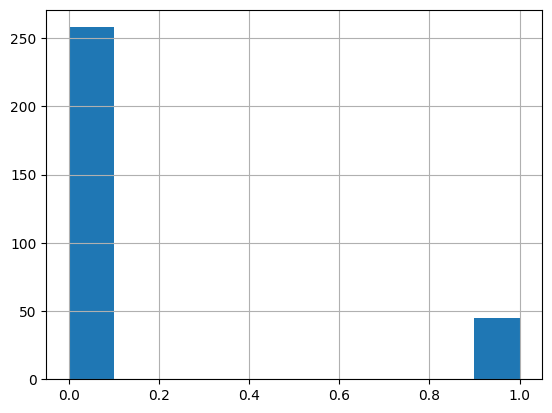

In [18]:
df['fasting_blood_sugar'].hist()

<Axes: >

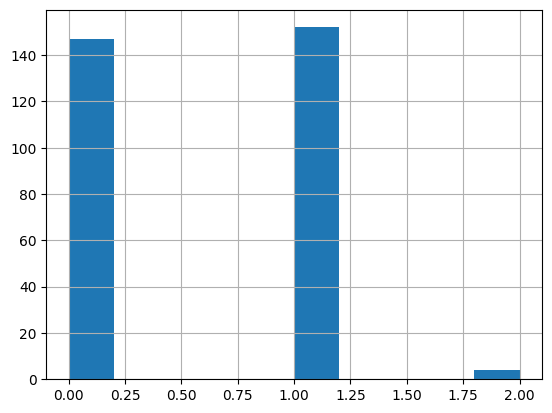

In [19]:
df['restecg'].hist()

<Axes: >

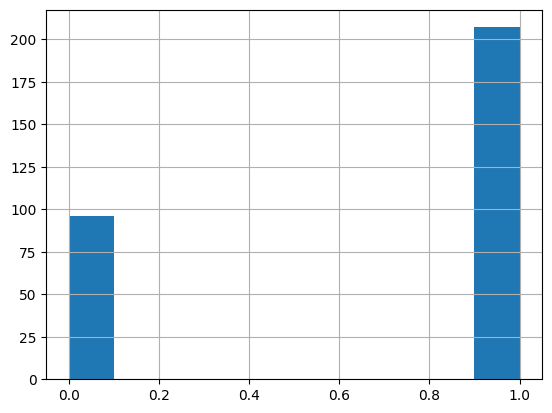

In [20]:
df['sex'].hist()

<Axes: >

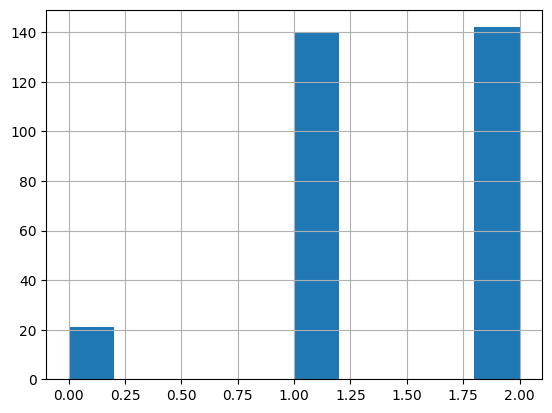

In [21]:
df['slope'].hist()

<Axes: >

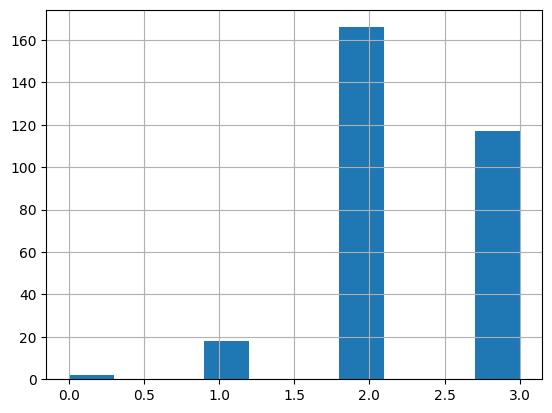

In [22]:
df['thal'].hist()

# **Resumo estatístico**

In [23]:
#Gera um resumo estatístico das colunas numéricas
df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Matriz de correlação**

In [24]:
# Calcula a matriz de correlação entre as colunas numéricas
df.corr()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_hr,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#** Frequência**

In [25]:
# Calcula a contagem de valores únicos em cada coluna
df.value_counts()

age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  restecg  max_hr  exang  oldpeak  slope  num_major_vessels  thal  target
38   1    2                138         175          0                    1        173     0      0.0      2      4                  2     1         2
59   1    0                110         239          0                    0        142     1      1.2      1      1                  3     0         1
          2                126         218          1                    1        134     0      2.2      1      1                  1     0         1
          1                140         221          0                    1        164     1      0.0      2      0                  2     1         1
          0                170         326          0                    0        140     1      3.4      0      0                  3     0         1
                                                                                                         

# **Correlação Heatmap**

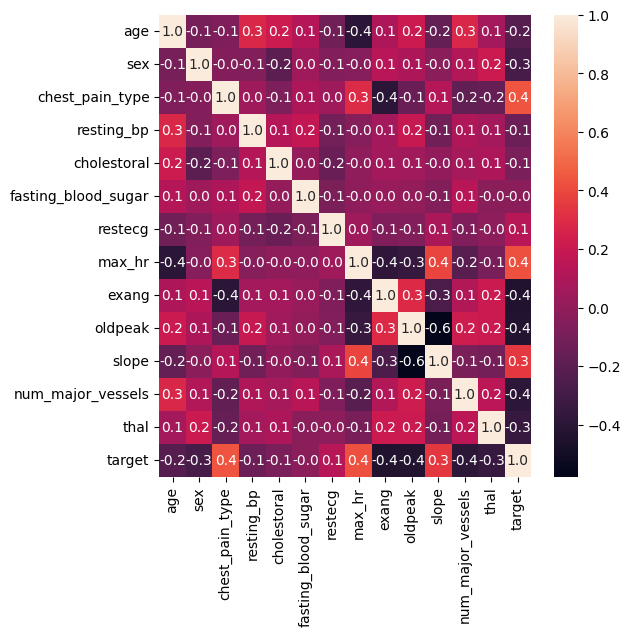

In [26]:
# Cria uma figura para o gráfico com tamanho 6x6 polegadas.
plt.figure(figsize = (6,6))

# Gera um heatmap da matriz de correlação
sns.heatmap(df.corr(),annot=True, fmt="1.1f");

# **Rede Neural Convulacional**

In [27]:
# Cria a variável 'x' para armazenar os recursos (todas as colunas, exceto 'target')
x = df.drop('target', axis=1)

# Cria a variável 'y' para armazenar o alvo (coluna 'target')
y = df['target']
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
# Cria uma instância do StandardScaler para padronizar os dados.
scaler = StandardScaler()

# Aplica o escalonamento padrão aos dados na variável 'x'.
x = scaler.fit_transform(x)

In [29]:
# Divide os dados em conjuntos de treinamento e teste.
# x_train: Conjunto de treinamento dos recursos.
# x_test: Conjunto de teste dos recursos.
# y_train: Conjunto de treinamento dos rótulos (alvos).
# y_test: Conjunto de teste dos rótulos (alvos).
# O parâmetro 'test_size=0.2' indica que 20% dos dados serão usados para teste, enquanto 80% serão usados para treinamento.
# O parâmetro 'random_state=42' define uma semente (seed) para a geração de números aleatórios, garantindo reprodutibilidade.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
# Redimensiona o tensor de entrada 'x' para adicionar uma dimensão (shape) adicional.
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Defina os inputs da rede neural com base no shape dos dados de entrada.
inputs = Input(shape = x.shape[1:])

# Cria uma camada de convolução 1D com 32 filtros e função de ativação ReLU.
x = Conv1D(32, 3, activation = 'relu')(inputs)

# Aplica uma camada de MaxPooling 1D para reduzir a dimensionalidade.
x = MaxPool1D(2)(x)

# Prepara os dados para prepará-los para camadas densas.
x = Flatten()(x)

# Adiciona uma camada densa (fully connected) com 128 neurônios e função de ativação ReLU.
x = Dense(128, activation = 'relu')(x)

# Defina a camada de saída com um único neurônio e função de ativação sigmoid (para problemas de classificação binária).
predictions = Dense(1, activation ='sigmoid')(x)

In [31]:
# Cria o modelo usando as camadas definidas anteriormente.
model = Model(inputs = inputs, outputs = predictions)

In [32]:
# Compila o modelo com um otimizador 'adam', função de perda 'binary_crossentropy' (para problemas de classificação binária) e métrica de 'accuracy'.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treina o modelo usando os dados de treinamento 'x_train' e 'y_train'.
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
8/8 [==============================] - 2s 95ms/step - loss: 0.6462 - accuracy: 0.6364 - val_loss: 0.5744 - val_accuracy: 0.8033
Epoch 2/10
8/8 [==============================] - 0s 18ms/step - loss: 0.5499 - accuracy: 0.7603 - val_loss: 0.4987 - val_accuracy: 0.8361
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4963 - accuracy: 0.7645 - val_loss: 0.4614 - val_accuracy: 0.8525
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4632 - accuracy: 0.7645 - val_loss: 0.4455 - val_accuracy: 0.8525
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.4461 - accuracy: 0.7769 - val_loss: 0.4492 - val_accuracy: 0.8525
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.4315 - accuracy: 0.7851 - val_loss: 0.4417 - val_accuracy: 0.8525
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4191 - accuracy: 0.7851 - val_loss: 0.4497 - val_accuracy: 0.8361
Epoch 8/10
8/8 [===========

In [33]:
#Faz previsões  usando o modelo treinado nos dados de teste 'x_test'.
y_pred = model.predict(x_test)

# Arredonde as previsões para os valores 0 ou 1, já que este é um problema de classificação binária.
y_pred = np.round(y_pred).flatten()

# Calcule a precisão (accuracy) comparando as previsões 'y_pred' com as etiquetas reais 'y_test'.
accuracy = accuracy_score(y_test, y_pred)

# Imprima a precisão em forma percentual.
print(accuracy * 100)

2/2 [==============================] - 0s 8ms/step
83.60655737704919


# **Árvore de decisão**

In [34]:
#Dividindo o conjunto de dados
x = df.drop('target', axis = 1)
y = df['target']

In [35]:
# Cria uma instância do StandardScaler, que será usada para padronizar os recursos.
scaler = StandardScaler()

# Aplica a transformação de padronização aos dados em 'x'.
x = scaler.fit_transform(x)

In [36]:
# Divide o conjunto de dados em treinamento e teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# Cria uma instância do modelo Decision Tree Classifier.
model = DecisionTreeClassifier(random_state = 42)

In [38]:
# Treine o modelo com os dados de treinamento
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Faz previsões com base nos dados de teste
y_pred = model.predict(x_test)

In [40]:
# Calcula a precisão do modelo comparando as previsões (y_pred) com os rótulos reais (y_test) dos dados de teste.
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7540983606557377

# **Rede Neural**

In [41]:
# x contém as características (recursos) dos dados, excluindo a coluna 'target'.
x = df.drop('target', axis=1)

# y contém o rótulo (alvo) dos dados, que é a coluna 'target'.
y = df['target']

In [42]:
# scaler é um objeto do StandardScaler, que será usado para padronizar as características.
scaler = StandardScaler()

# x contém as características (recursos) dos dados.
# A seguir, aplicamos o scaler para padronizar as características.
x = scaler.fit_transform(x)

In [43]:
# Dividindo os dados em conjuntos de treinamento (treino) e teste (teste).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
# Criação do modelo de rede neural sequencial
model = Sequential()

# Adição de uma camada densa (fully connected) com 64 neurônios, função de ativação ReLU
# e número de entradas igual ao número de características em x_train.
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))

# Adição de uma segunda camada densa com 32 neurônios e função de ativação ReLU.
model.add(Dense(32, activation='relu'))

# Adição da camada de saída com 1 neurônio e função de ativação sigmoid, adequada para problemas de classificação binária.
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo, especificando a função de perda (loss), otimizador e métrica de avaliação.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
#configurando o mecanismo de parada antecipada (early stopping) para o treinamento do modelo de rede neural.
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

In [46]:
# Treinamento do modelo e registro do histórico
history = model.fit(x_train, y_train, validation_data = (x_test, y_test))

8/8 [==============================] - 3s 90ms/step - loss: 0.6676 - accuracy: 0.6157 - val_loss: 0.6029 - val_accuracy: 0.6393


In [47]:
# Avaliação do modelo nos dados de teste
loss, accuracy = model.evaluate(x_test, y_test)
accuracy

2/2 [==============================] - 0s 21ms/step - loss: 0.6029 - accuracy: 0.6393


0.6393442749977112

# **Rede Neural - CrossValidation**


In [48]:
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset_angina/heart.csv')
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
x = df.drop(['target'], axis = 1)
y = df['target']
# Definir o número de folds para a validação cruzada
n_folds = 5

# Criar os folds
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Lista para armazenar as métricas de cada fold
loss_scores = []
accuracy_scores = []
classification_reports = []

# Iterar sobre os folds
for train_index, val_index in skf.split(x, y):
    # Dividir os dados em treinamento e validação para o fold atual
    x_train_fold, x_val_fold = x.iloc[train_index], x.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    oversampler = RandomOverSampler(random_state = 42)
    x_train_fold_resampled, y_train_fold_resampled = oversampler.fit_resample(x_train_fold, y_train_fold)

    undersampler = RandomUnderSampler(random_state = 42)
    x_train_fold_resampled, y_train_fold_resampled = undersampler.fit_resample(x_train_fold_resampled, y_train_fold_resampled)

    # Criar o modelo
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=64, activation='relu', input_dim=x.shape[1]))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    # Compilar o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    model.fit(x_train_fold_resampled, y_train_fold_resampled, batch_size=32, epochs=10, verbose=0)

    # Avaliar o modelo no fold de validação
    loss, accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Armazenar as métricas do fold atual
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    y_pred_prob = model.predict(x_val_fold)
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)
    classification_report_fold = classification_report(y_val_fold, y_pred)
    classification_reports.append(classification_report_fold)

# Calcular as médias das métricas de todos os folds
mean_loss = np.mean(loss_scores)
accuracy_scores = [float(report.split()[-2]) for report in classification_reports]
mean_accuracy = np.mean(accuracy_scores)

print("Mean Classification Accuracy:", mean_accuracy)

print("Mean Loss:", mean_loss)
print("Mean Accuracy:", mean_accuracy)

for i, report in enumerate(classification_reports):
    print(f"Classification Report Fold {i+1}:")
    print(report)
    print("--------------------")

2/2 [==============================] - 0s 8ms/step


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 7ms/step
Mean Classification Accuracy: 0.598
Mean Loss: 0.8170130133628846
Mean Accuracy: 0.598
Classification Report Fold 1:
              precision    recall  f1-score   support

           0       0.55      0.93      0.69        28
           1       0.86      0.36      0.51        33

    accuracy                           0.62        61
   macro avg       0.71      0.65      0.60        61
weighted avg       0.72      0.62      0.59        61

--------------------
Classification Report Fold 2:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        28
           1       0.67      0.42      0.52        33

    accuracy                           0.57        61
   macro avg       0.60      0.59      0.57        61
weighted avg       0.60      0.57      0.56        61

--------------------
Classification Report Fold 3:
              precision    recall  f1-score   support

           0       0.

# **XGBOOST**

In [50]:
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset_angina/heart.csv')
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [51]:
# Carregando o conjunto de dados
file_path = '/content/drive/MyDrive/TCC/dataset_angina/heart.csv'
df = pd.read_csv(file_path)

# Separa os recursos (X) e o alvo (y)
x = df.drop(columns=['target'])
y = df['target']

# Definir o número de folds para a validação cruzada
n_folds = 5

# Criar os folds
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Lista para armazenar as métricas de cada fold
loss_scores = []
accuracy_scores = []
classification_reports = []

# Interar sobre os folds
for train_index, val_index in skf.split(x, y):
    # Dividir os dados em treinamento e validação para o fold atual
    x_train_fold, x_val_fold = x.iloc[train_index], x.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    oversampler = RandomOverSampler(random_state=42)
    x_train_fold_resampled, y_train_fold_resampled = oversampler.fit_resample(x_train_fold, y_train_fold)

    undersampler = RandomUnderSampler(random_state=42)
    x_train_fold_resampled, y_train_fold_resampled = undersampler.fit_resample(x_train_fold_resampled, y_train_fold_resampled)

    # Converter os dados para o formato DMatrix do XGBoost
    dtrain = xgb.DMatrix(x_train_fold_resampled, label=y_train_fold_resampled)
    dval = xgb.DMatrix(x_val_fold, label=y_val_fold)

    # Definir os parâmetros do XGBoost
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 4,
        'learning_rate': 0.1,
        'n_estimators': 100,
        'seed': 42
    }

    # Treinar o modelo XGBoost
    model = xgb.train(params, dtrain, num_boost_round=10)

    # Prever no conjunto de validação
    y_pred_prob = model.predict(dval)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calcular as métricas
    loss = log_loss(y_val_fold, y_pred_prob)
    accuracy = accuracy_score(y_val_fold, y_pred)

    # Armazenar as métricas do fold atual
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    classification_report_fold = classification_report(y_val_fold, y_pred)
    classification_reports.append(classification_report_fold)

# Calcular as médias das métricas de todos os folds
mean_loss = np.mean(loss_scores)
accuracy_scores = [float(report.split()[-2]) for report in classification_reports]
mean_accuracy = np.mean(accuracy_scores)

print("Mean Classification Accuracy:", mean_accuracy)
print("Mean Loss:", mean_loss)
print("Mean Accuracy:", mean_accuracy)

for i, report in enumerate(classification_reports):
    print(f"Classification Report Fold {i+1}:")
    print(report)
    print("--------------------")

[16:26:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:37] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:38] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Mean Classification Accuracy: 0.8019999999999999
Mean Loss: 0.4797681615793746
Mean Accuracy: 0.8019999999999999
Classification Report Fold 1:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

--------------------
Classification Report Fold 2:
              precision    re

In [52]:
# Carregando o conjunto de dados
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset_angina/heart.csv')

# Separar as características (X) e o alvo (y)
X = df.drop('target', axis=1)
y = df['target']

# Configurar a validação cruzada estratificada com 5 folds
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Listas para armazenar métricas
loss_scores = []
accuracy_scores = []
classification_reports = []

# Definir o espaço de hiperparâmetros para o XGBoost
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Criar o modelo XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)

# Realizar a busca de hiperparâmetros usando Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=skf, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X, y)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Configurar os hiperparâmetros otimizados
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'n_estimators': best_params['n_estimators'],
    'seed': 42
}

# Iterar sobre os folds da validação cruzada
for train_index, val_index in skf.split(X, y):
    # Dividir os dados em treinamento e validação para o fold atual
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Treinar o modelo XGBoost com os hiperparâmetros otimizados
    dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold)
    dval = xgb.DMatrix(X_val_fold, label=y_val_fold)
    model = xgb.train(params, dtrain, num_boost_round=10)

    # Fazer previsões no conjunto de validação
    y_pred_prob = model.predict(dval)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calcular as métricas de perda e precisão
    loss = log_loss(y_val_fold, y_pred_prob)
    accuracy = accuracy_score(y_val_fold, y_pred)

    # Armazenar as métricas do fold atual
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    # Calcular o relatório de classificação e armazená-lo
    classification_report_fold = classification_report(y_val_fold, y_pred)
    classification_reports.append(classification_report_fold)

# Calcular as médias das métricas de todos os folds
mean_loss = np.mean(loss_scores)
accuracy_scores = [float(report.split()[-2]) for report in classification_reports]
mean_accuracy = np.mean(accuracy_scores)

print("Mean Classification Accuracy:", mean_accuracy)
print("Mean Loss:", mean_loss)
print("Mean Accuracy:", mean_accuracy)

# Exibir os relatórios de classificação para cada fold
for i, report in enumerate(classification_reports):
    print(f"Classification Report Fold {i+1}:")
    print(report)
    print("--------------------")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
[16:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[16:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Mean Classification Accuracy: 0.7939999999999999
Mean Loss: 0.5536933815567615
Mean Accuracy: 0.7939999999999999
Classification Report Fold 1:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85 

# **Precisão modelo XGBOOST**

In [53]:
# Importar a métrica de precisão
from sklearn.metrics import precision_score

# Lista para armazenar as pontuações de precisão de cada fold
precision_scores = []

# Loop de validação cruzada
for train_index, val_index in skf.split(df.drop(['target'], axis=1), df['target']):

    # Calcular a precisão para o fold atual
    precision = precision_score(y_val_fold, y_pred)

    # Armazenar a pontuação de precisão do fold atual
    precision_scores.append(precision)

# Calcular a precisão média de todos os folds
mean_precision = np.mean(precision_scores)

# Imprimir a precisão média
print("Precisão Média:", mean_precision)

Precisão Média: 0.7317073170731707


# **Cross-validation**

In [54]:
# Carregando o conjunto de dados
data = '/content/drive/MyDrive/TCC/dataset_angina/heart.csv'
df = pd.read_csv(data)

# Separando as características (X) e o alvo (y)
X = df.drop('target', axis=1)
y = df['target']

# Criando um modelo RandomForest com 100 árvores e definir uma semente para a aleatoriedade
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Definindo uma métrica personalizada: precisão
scoring = make_scorer(accuracy_score)

# Criando um validador cruzado estratificado com 5 divisões
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Executando a validação cruzada e calcular a precisão para cada fold
scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

# Imprimindo os resultados
print("Scores de Precisão da Validação Cruzada:", scores)
print("Precisão Média:", np.mean(scores))

Scores de Precisão da Validação Cruzada: [0.85245902 0.83606557 0.75409836 0.81666667 0.81666667]
Precisão Média: 0.815191256830601





**Teste com Rede Neural e XGBOOST**




In [55]:
# Carregando o conjunto de dados a partir do arquivo CSV
data = '/content/drive/MyDrive/TCC/dataset_angina/heart.csv'
df = pd.read_csv(data)

# Separando as características (X) e o alvo (y)
X = df.drop(columns=['target'])
y = df['target']

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os modelos que deseja comparar
models = [
    ('XGBoost', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),
    ('Rede Neural', MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42))
]

results = []
for name, model in models:
    if name == 'Rede Neural':
        # Pré-processamento dos dados para a rede neural
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        model_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scoring = make_scorer(accuracy_score)
        scores = cross_val_score(model, X_scaled, y, cv=model_cv, scoring=scoring)
    else:
        model_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scoring = make_scorer(accuracy_score)
        scores = cross_val_score(model, X, y, cv=model_cv, scoring=scoring)

    results.append((name, scores))

# Exibir os resultados de precisão média e desvio padrão para cada modelo
for name, scores in results:
    print(f'{name}: Precisão Média: {np.mean(scores):.4f}, Desvio Padrão: {np.std(scores):.4f}')

XGBoost: Precisão Média: 0.7823, Desvio Padrão: 0.0486
Rede Neural: Precisão Média: 0.8052, Desvio Padrão: 0.0384


In [56]:

# Carregando o conjunto de dados
data = '/content/drive/MyDrive/TCC/dataset_angina/heart.csv'
df = pd.read_csv(data)

# Separando as características (X) e o alvo (y)
X = df.drop(columns=['target'])
y = df['target']

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os modelos que deseja comparar
models = [
    ('XGBoost', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),
    ('Rede Neural', MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42))
]

results = []
for name, model in models:
    if name == 'Rede Neural':
        # Pré-processamento dos dados para a rede neural
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scoring = make_scorer(accuracy_score)
        scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=scoring)
    else:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scoring = make_scorer(accuracy_score)
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

    results.append((name, scores))

# Exibindo os resultados de precisão média e desvio padrão para cada modelo
for name, scores in results:
    print(f'{name}: Precisão Média: {np.mean(scores):.4f}, Desvio Padrão: {np.std(scores):.4f}')

# Avaliar cada modelo nos dados de teste
for name, model in models:
    if name == 'Rede Neural':
        # Treinar o modelo com os dados de treinamento escalados
        model.fit(X_train_scaled, y_train)
        # Escalar os dados de teste
        X_test_scaled = scaler.transform(X_test)
        # Fazer previsões nos dados de teste
        y_pred = model.predict(X_test_scaled)
    else:
        # Treinar o modelo com os dados de treinamento originais
        model.fit(X_train, y_train)
        # Fazer previsões nos dados de teste
        y_pred = model.predict(X_test)
    # Calcular a precisão nos dados de teste
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} (Teste): Precisão: {test_accuracy:.4f}')


XGBoost: Precisão Média: 0.8161, Desvio Padrão: 0.0314
Rede Neural: Precisão Média: 0.7829, Desvio Padrão: 0.0724
XGBoost (Teste): Precisão: 0.8022
Rede Neural (Teste): Precisão: 0.7253
